In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid') # palette="pastel" 

import warnings
warnings.filterwarnings("ignore")

- 청와대 국민청원 데이터를 사용한 파이썬 자연어 처리 실습 
- source : https://github.com/akngs/petitions

In [2]:
petitions = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                        parse_dates = ['start', 'end'])

In [3]:
print(petitions.shape)
petitions.head(10)

(395547, 8)


,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
6,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
8,29,2017-08-19,2017-09-18,0,3,미래,문재인 정부는 왜 공무원개혁엔 무관심한가?,살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...
9,30,2017-08-19,2017-11-17,0,1,일자리,A/S 기사들도 관심을 가져주십시요,안녕하세요. 저는 LG전자 서비스센터에서 근무하고 있는 서비스 기사입니다. 이곳에 ...


In [4]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
article_id    395547 non-null int64
start         395547 non-null datetime64[ns]
end           395547 non-null datetime64[ns]
answered      395547 non-null int64
votes         395547 non-null int64
category      395547 non-null object
title         395547 non-null object
content       395546 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [5]:
petitions['votes'].max()

1192049

In [6]:
petitions[petitions['votes'] == 1192049]

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...


In [7]:
petitions.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

- 가장 많은 투표(공감)을 얻은 청원은, 강서구 피씨방 살인사건 관련 건이다. 
- 관리가 잘 되고 있는 게시판으로 부터의 데이터라서, 결측값은 신경쓰지 않아도 될 듯 하다. 

In [8]:
#### 투표수 20만건 이상이면 청와대가 답변하도록 되어 있음 
petitions['answer'] = (petitions['votes'] > 200000) == 1 
petitions.tail()

,article_id,start,end,answered,votes,category,title,content,answer
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...,False
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...,False
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...,False
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하...",False
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;,False


In [9]:
#### 청원 시작일로부터 종료일까지 걸린 시간을 duration 변수로 생성 
petitions['duration'] = petitions['end'] - petitions['start']

print ( petitions['duration'].mean() ) 
print('------------------------------------------------------------------------------------------')
print( petitions.sort_values(by= 'duration' , ascending = False).head(1) )
print('------------------------------------------------------------------------------------------')
print( petitions.sort_values(by= 'duration' , ascending = False).tail(1) )

30 days 21:33:35.769554
------------------------------------------------------------------------------------------
   article_id      start        end  answered  votes category  \
0          21 2017-08-19 2017-11-17         0      9    안전/환경   

                 title                                            content  \
0  스텔라 데이지호에 대한 제안입니다.  스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...   

   answer duration  
0   False  90 days  
------------------------------------------------------------------------------------------
       article_id      start        end  answered  votes category  title  \
10771       10826 2017-09-06 2017-09-13         0      0   인권/성평등  소년법폐지   

           content  answer duration  
10771  소년법폐지 청원합니다   False   7 days  


- 평균 완료기간은 30일이며, 최소 7일, 최장 90일만에 완료되었음을 알 수 있다. 

In [10]:
petitions[petitions['duration'] == '7 days']

,article_id,start,end,answered,votes,category,title,content,answer,duration
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False,7 days
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,False,7 days
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,False,7 days
14,35,2017-08-19,2017-08-26,0,0,외교/통일/국방,문재인정부는 신한국형 페리프로세스가 작성했습니다.,문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다.\n<신한국형 페리 프로세...,False,7 days
15,36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days
...,...,...,...,...,...,...,...,...,...,...
13765,13836,2017-09-14,2017-09-21,0,2,일자리,초등스포츠강사,초등스포츠강사로 5년째 일하고 있습니다 이번에 무기계약직이 불발이 되면서 가슴이 아...,False,7 days
13775,13847,2017-09-14,2017-09-21,0,0,육아/교육,학교를 학교답게 해주세요,안녕하세요!!! 저는 용인시 수지구 수지초등학교 학부모입니다!\n수지초등학교는 인근...,False,7 days
13782,13854,2017-09-14,2017-09-21,0,0,안전/환경,당진경찰서에 범죄단체와 다름없는 당진시 흥신소 상위1-2개 업체를 단속하라고 지시하...,당진경찰서에 범죄단체와 다름없는 당진시 흥신소 상위1-2개 업체를 단속하라고 지시하...,False,7 days
13788,13861,2017-09-14,2017-09-21,0,70,안전/환경,"과천 문원중학교, 문원초등학교, 과천고등학교 천장 석면제거공사에서 심각한 석면오염이...","경기도 교육청에서 2017년 1월 겨울방학중 진행한\n과천 문원중학교, 문원초등학교...",False,7 days


In [11]:
petitions[ (petitions['duration'] == '7 days')  &  (petitions['answer'] == 1) ]

,article_id,start,end,answered,votes,category,title,content,answer,duration


In [12]:
petitions[ (petitions['duration'] == '90 days')  &  (petitions['answer'] == 1) ]

,article_id,start,end,answered,votes,category,title,content,answer,duration
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


In [13]:
#### 카데코리별로 어떤 분야의 청원이 가장 많았는가? 
petitions_cat = pd.DataFrame(petitions['category'].value_counts()).reset_index()
petitions_cat.columns = ['category', 'counts']
petitions_cat

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


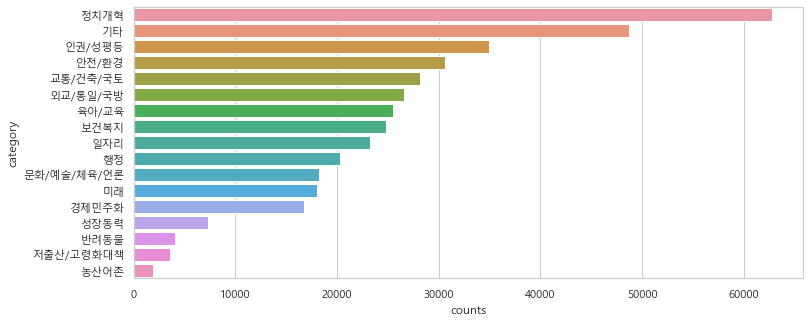

In [14]:
## 국내데이터 이므로 한글폰트 사용가능하도록 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (14,4)
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (12,5))
sns.barplot(data = petitions_cat, y = 'category', x = 'counts')

In [15]:
#### 투표를 많이 받은 청원은 어떤 것들인가? 
petitions_votes = pd.pivot_table(petitions, index = 'category', aggfunc = sum).sort_values(by = 'votes', ascending = False).reset_index()
petitions_votes

,category,answer,answered,article_id,votes
0,인권/성평등,24.0,9,7963154504,12559348
1,안전/환경,10.0,2,7529327085,6605175
2,정치개혁,8.0,2,14675522264,6205013
3,기타,8.0,1,12225143856,5190468
4,육아/교육,3.0,1,5822857976,4475297
5,보건복지,3.0,2,6589637853,4341211
6,문화/예술/체육/언론,7.0,4,4427495546,4149796
7,외교/통일/국방,4.0,1,6869752323,3696112
8,교통/건축/국토,3.0,2,8551310963,2902330
9,반려동물,4.0,0,1033826398,2066624


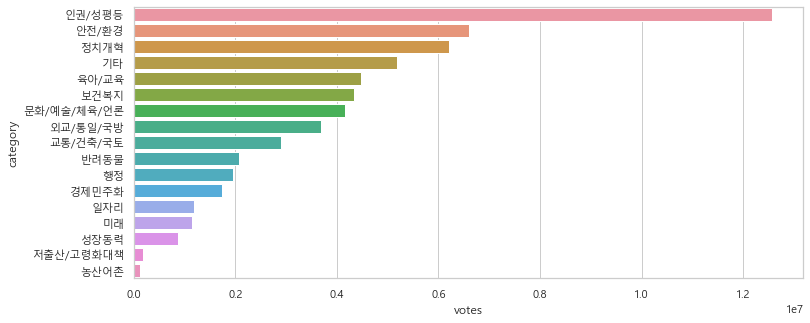

In [16]:
plt.figure(figsize = (12,5))
sns.barplot(data = petitions_votes, y = 'category', x = 'votes')

In [17]:
#### 투표가 가장 많이 행해졌던 날짜는 언제이며, 어떤 이슈가 있었는가? 
petitions_hotday = petitions.sort_values(by= 'votes', ascending = False)
petitions_hotday.head()

,article_id,start,end,answered,votes,category,title,content,answer,duration
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days


In [18]:
#### 약 39만건의 청원 중, 답변대상(votes > 20만건)은 몇건이나 되며 어떤 내용들인가? 
petitions_answered = petitions[petitions['votes'] > 200000]
petitions_answered.shape

(80, 10)

In [19]:
petitions_answered.sort_values(by = 'votes', ascending = False).head(10)

,article_id,start,end,answered,votes,category,title,content,answer,duration
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
327873,426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
242969,314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
303793,395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
336559,437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days
340046,442093,2018-11-14,2018-12-14,0,365418,인권/성평등,이수역 폭행사건,11월 13일 새벽4시 경 이수역의 한 맥주집에서 남자 다섯명이 여성 두 명을 폭행...,True,30 days


In [20]:
#### 청원 건수 추이를 시계열로 살펴보자 
#### 먼저 start를 분석하기 편하게 변환 
def concatenate_yy_mm_dd(start) : 
    return '{0}-{1}'.format(start.year, start.month)

petitions['start_yy_mm'] = petitions['start'].apply(concatenate_yy_mm_dd)
petitions.head(1)

,article_id,start,end,answered,votes,category,title,content,answer,duration,start_yy_mm
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days,2017-8


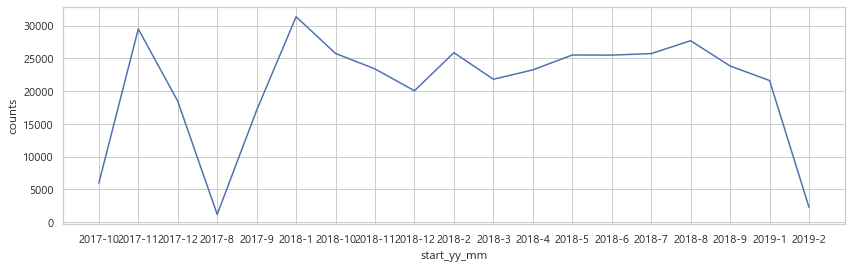

In [21]:
#### 월별 청원 갯수 트렌드 
petitions_trend1 = petitions['start_yy_mm'].value_counts().reset_index()
petitions_trend1.columns = ['start_yy_mm', 'counts']
sns.lineplot(data =petitions_trend1, x = 'start_yy_mm' , y='counts')

In [22]:
petitions_trend2 = pd.pivot_table(petitions, index = 'start_yy_mm', aggfunc=sum).reset_index()
petitions_trend2

,start_yy_mm,answer,answered,article_id,votes
0,2017-10,0.0,0,129342700,601138
1,2017-11,3.0,3,1191379726,2732282
2,2017-12,2.0,2,1228610355,2227942
3,2017-8,0.0,0,716747,358044
4,2017-9,3.0,3,166785406,1880947
5,2018-1,7.0,7,3130673468,4005977
6,2018-10,14.0,2,10579997057,7465948
7,2018-11,6.0,0,10335032000,4181155
8,2018-12,3.0,0,9430885826,2483865
9,2018-2,7.0,7,3605623937,3819966


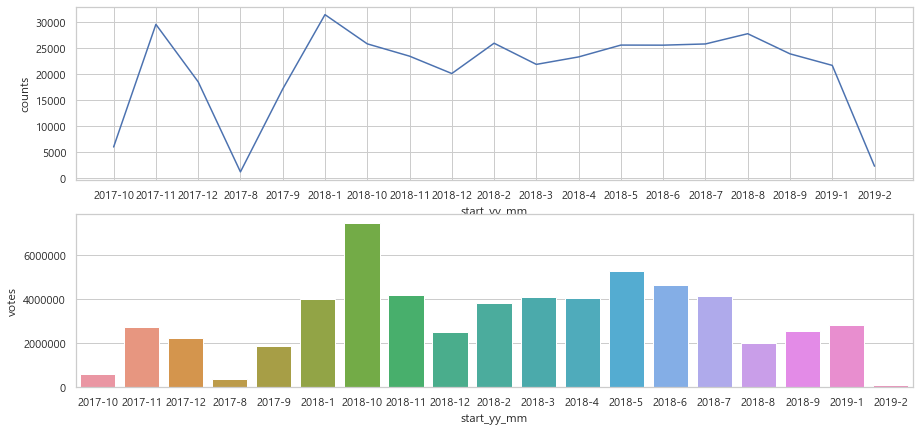

In [23]:
## 월별 청원갯수 & 투표갯수 
figure, (ax1,ax2) = plt.subplots(nrows=2)
figure.set_size_inches(15,7)
sns.lineplot(data =petitions_trend1, x = 'start_yy_mm' , y='counts', ax=ax1)
sns.barplot(data = petitions_trend2, x = 'start_yy_mm', y='votes', ax=ax2)

In [24]:
petitions_trend3 = petitions.groupby(['start_yy_mm', 'category'])['votes'].sum()
petitions_trend3

start_yy_mm  category   
2017-10      경제민주화            6323
             교통/건축/국토        19234
             기타             137225
             농산어촌              984
             문화/예술/체육/언론    105445
                             ...  
2019-2       인권/성평등           9656
             일자리              6604
             저출산/고령화대책          98
             정치개혁            19563
             행정               1493
Name: votes, Length: 323, dtype: int64

In [25]:
### 상위3개 카테고리만 추려서, 월별 트렌드를 알아보자 
petitions_top3_cat = petitions[(petitions['category'] == '인권/성평등') | (petitions['category'] == '안전/환경') | (petitions['category'] == '정치개혁')]
print( petitions_top3_cat.shape )
petitions_top3_cat.head()

(128381, 11)


,article_id,start,end,answered,votes,category,title,content,answer,duration,start_yy_mm
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False,90 days,2017-8
6,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...,False,30 days,2017-8
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...,False,90 days,2017-8
15,36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...,False,7 days,2017-8
91,115,2017-08-20,2017-09-19,0,0,인권/성평등,양성평등,안녕하세요. 저는 서울문영여자고등학교에 재학 중인 1학년 김가영입니다. 저는 교내에...,False,30 days,2017-8


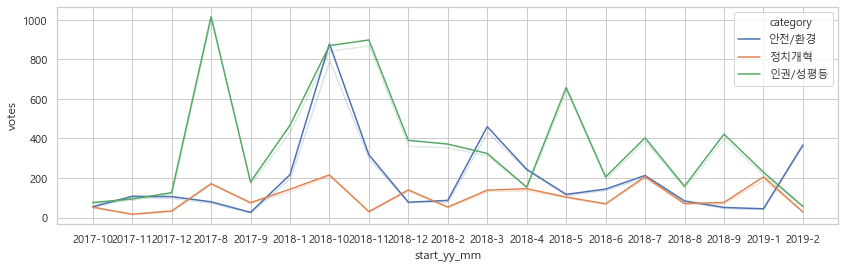

In [26]:
sns.lineplot(data = petitions_top3_cat, x='start_yy_mm', y='votes', hue = 'category', ci=0)

In [27]:
#####################################################################
######### 명사들을 추출하여 Word Cloud 만들어 보기 
#####################################################################

In [28]:
!pip install soynlp
!pip install wordcloud 

In [29]:
import re
from soynlp.tokenizer import RegexTokenizer
from wordcloud import WordCloud

In [30]:
#### 관심있는 키워드들을 설정한다. 
p = r'.*(부동산 | 집값).*'

In [31]:
issues = petitions[petitions['title'].str.match(p) | petitions['content'].str.match(p, flags = re.MULTILINE)]
print( issues.shape )
issues.head()

(14387, 11)


,article_id,start,end,answered,votes,category,title,content,answer,duration,start_yy_mm
57,80,2017-08-20,2017-08-27,0,7,교통/건축/국토,부동산 거래절벽으로 인한 고통,8.2 대책후 매수세가 싹 사라졌습니다..\n집을 팔고 이사를 해야되는데..너무 강...,False,7 days,2017-8
74,98,2017-08-20,2017-11-18,0,601,교통/건축/국토,"부동산 투기과열지구 지방(대구, 부산)으로 확대해주십시오!!",안녕하십니까? 저는 8.2 부동산 대책의 취지와 방향에 적극 지지하는 국민 중 한 ...,False,90 days,2017-8
97,121,2017-08-20,2017-08-27,0,5,기타,분당도 집값 좀 잡아주셔요 ㅠ,8월 대책 발표 후 분당 집값은 호가 실거래 모두 상승하고 있습니다. 아이가 커가면...,False,7 days,2017-8
102,126,2017-08-20,2017-08-27,0,2342,행정,대통령님! 8.2 부동산 대책 소급적용 부당성에 대해 청원드립니다,대통령님\n취임 이후 어려운 상황 속에서도 원만한 국정 운영을 해 주신 점 국민의 ...,False,7 days,2017-8
108,132,2017-08-20,2017-09-19,0,1,경제민주화,보유세인상 분양가상한제 사업자등록의무화,다주택자들이 매도안하고 버티고있습니다. 경제는 2012년 2013년과 다를바없는데 ...,False,30 days,2017-8


In [54]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','그럼', '이런', '저런', '합니다','많은', 
                '많이', '정말', '너무', '000', '000만원', '000원', 'n3', 'n1', 'nTV'] 

In [33]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = font_path,                 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                        width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

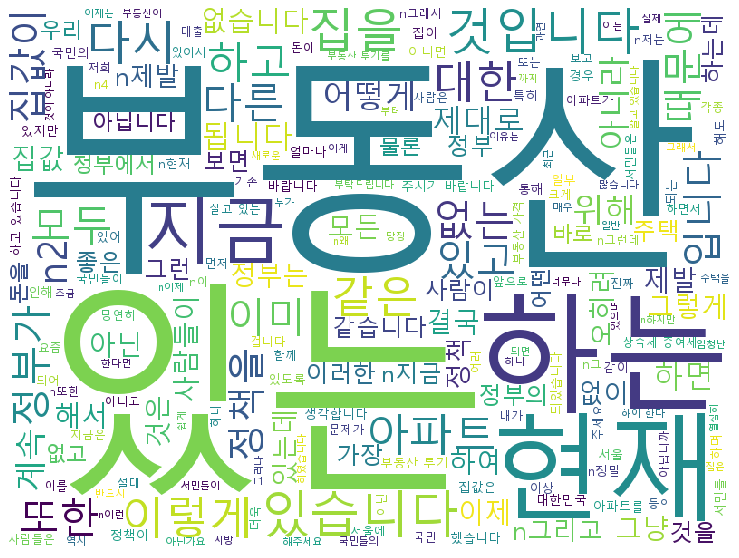

Wall time: 22.8 s


In [34]:
%time displayWordCloud(' '.join(issues['content']))

In [35]:
### 명사만 추출하자 
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(issues['content'])
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (117691, 61671) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 21131 nouns are extracted


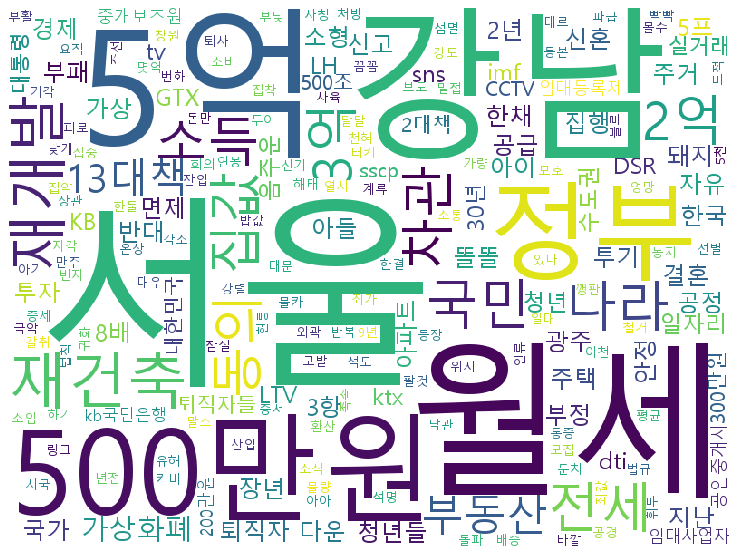

Wall time: 2.28 s


In [36]:
%time displayWordCloud(' '.join(nouns))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (6200, 3811) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 1399 nouns are extracted


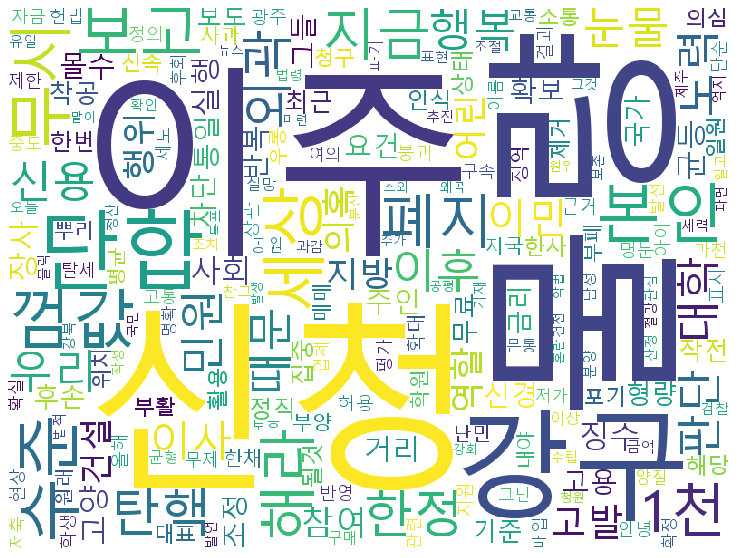

Wall time: 1.95 s


In [37]:
#### 타이틀만 가지고 다시 해보면 
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(issues['title'])
nouns2 = noun_extractor.extract()

%time displayWordCloud(' '.join(nouns2))

In [51]:
##################################################################
#### top5 category별로 title을 그려보자 
##################################################################

petitions_cat1 = petitions[(petitions['category'] == '인권/성평등')]
petitions_cat2 = petitions[petitions['category'] == '안전/환경']
petitions_cat3 = petitions[petitions['category'] == '정치개혁']
petitions_cat4 = petitions[petitions['category'] == '교통/건축/국토']
petitions_cat5 = petitions[petitions['category'] == '외교/통일/국방']

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (11498, 6745) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2772 nouns are extracted


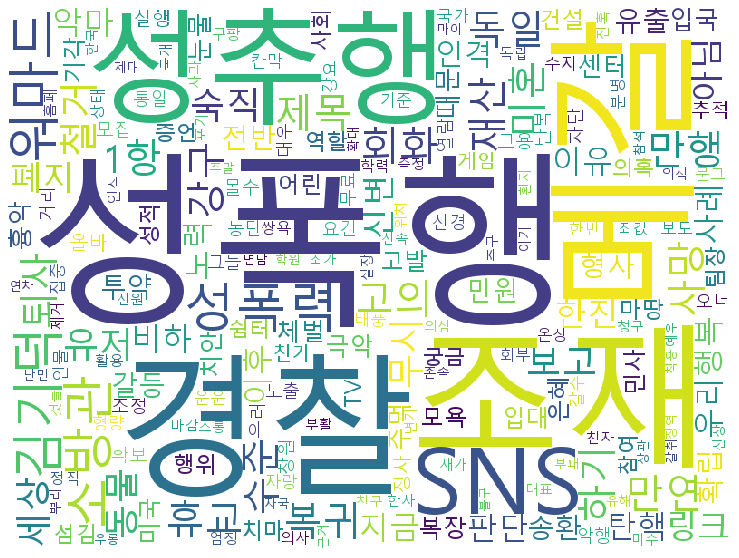

Wall time: 1.9 s


In [47]:
## cat1 : 인권/성평등 
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(petitions_cat1['title'])
nouns_c1 = noun_extractor.extract()
%time displayWordCloud(' '.join(nouns_c1))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (10212, 6115) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2464 nouns are extracted


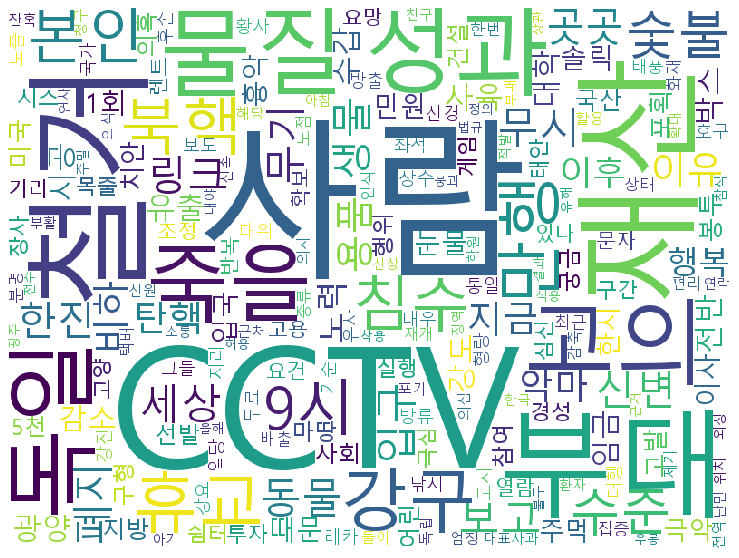

Wall time: 1.93 s


In [48]:
## cat2 : 안전/환경  
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(petitions_cat2['title'])
nouns_c2 = noun_extractor.extract()
%time displayWordCloud(' '.join(nouns_c2))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (18273, 10995) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 4253 nouns are extracted


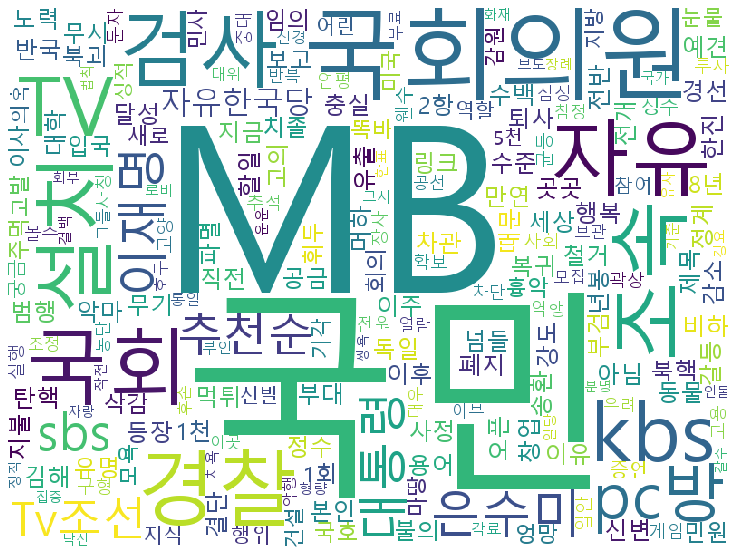

Wall time: 1.97 s


In [50]:
## cat3 : 정치개혁
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(petitions_cat3['title'])
nouns_c3 = noun_extractor.extract()
%time displayWordCloud(' '.join(nouns_c3))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (10606, 6582) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2572 nouns are extracted


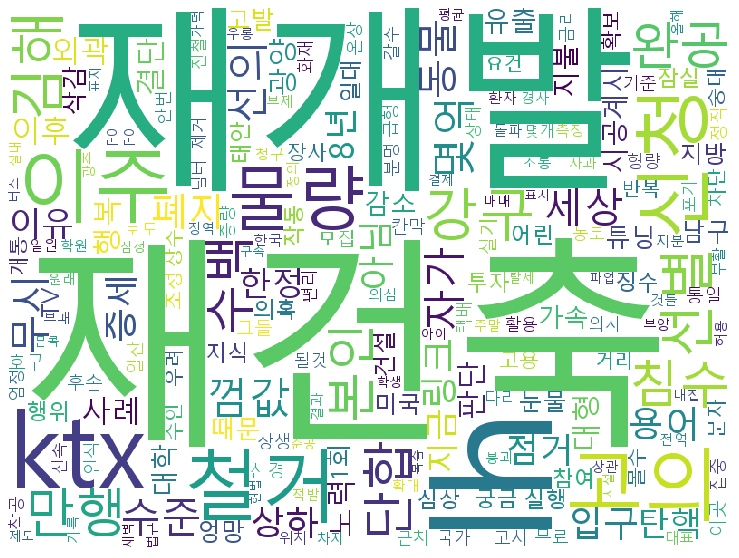

Wall time: 2.08 s


In [52]:
## cat4 : 교통/건축/국토
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(petitions_cat4['title'])
nouns_c4 = noun_extractor.extract()
%time displayWordCloud(' '.join(nouns_c4))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (9774, 5831) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2425 nouns are extracted


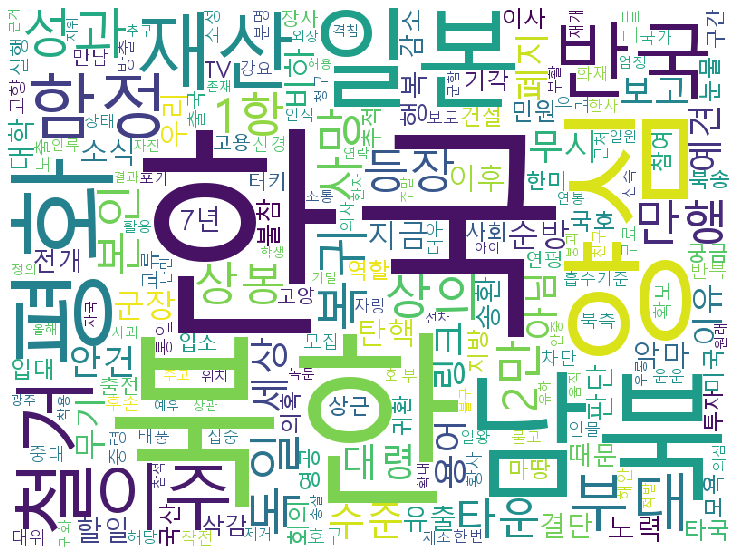

Wall time: 2.12 s


In [53]:
## cat5 : 외교/통일/국방
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(petitions_cat5['title'])
nouns_c5 = noun_extractor.extract()
%time displayWordCloud(' '.join(nouns_c5))